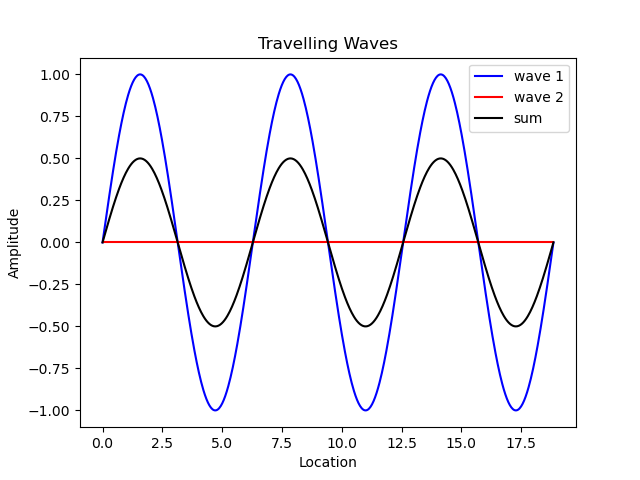

In [4]:
# travelling_waves.ipynb
# Cell 1

%matplotlib widget

from collections import namedtuple #named tuple allows you to assign a name to an index number
#in a tuple

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation #FuncAnimation module makes animated or live
#graphs, i.e. dynamically draw a function as it evolves over time

WaveParms = namedtuple("WaveParms", ["Amplitude", "WaveNumber", "Omega"]) #name the parameters
#in a tuple of this kind
wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16) #assign values to variables
# in the tuple wave1_parms
wave2_params = WaveParms(Amplitude=0, WaveNumber=0, Omega=0)


def plot(ax, show_waves):
    global xa, wave1, wave2, wave3 #global declares that the following variables are global

    xa = np.linspace(0, 6 * np.pi, 600) #domain is from 0 to 6pi, 600 subdomains

    ya1 = wave1_params.Amplitude * np.sin(wave1_params.WaveNumber * xa) #define waves using
    #the named tuple whose values we have defined, and are accessing
    ya2 = wave2_params.Amplitude * np.sin(wave2_params.WaveNumber * xa) #this is vectorized,
    #computing ya2 for all x and sticking in a new array
    ya3 = (ya1 + ya2) / 2 #compute ya3 array from ya1 and ya2 arrays

    if show_waves: #if true
        (wave1,) = ax.plot(xa, ya1, color="blue", label="wave 1") #plot() returns a 
        #tuple, so we only unpack a specific value from that tuple and ignore the 
        #other values
        (wave2,) = ax.plot(xa, ya2, color="red", label="wave 2")
    else: #if false, draw invisible plot
        (wave1,) = ax.plot(xa, ya1, color="white")
        (wave2,) = ax.plot(xa, ya2, color="white")

    # Plot the superposition of wave1 and wave2
    (wave3,) = ax.plot(xa, ya3, color="black", label="sum")

    ax.set_title("Travelling Waves")
    ax.set_xlabel("Location")
    ax.set_ylabel("Amplitude")

    ax.legend(loc="upper right") #specify legend is in upper right area


def anim_frame_counter():
    n = 0 #start at zeroth fram
    # 160 frames = 4 secs (at 40 frames/sec)
    while n < 160:
        n += 1 #every time function is called, n is increased by 1 until it hits 160
        yield n #yield is like return, but the next time the function is called, it starts
        #at previous yield value and not the beginning


def anim_draw_frame(t): #this function updates the wave values when new frames are pulled, 
    #function of t
    ya1 = wave1_params.Amplitude * np.sin(
        wave1_params.WaveNumber * xa + wave1_params.Omega * t
    )
    wave1.set_data(xa, ya1) #replaced old data with new data (from new time)
    ya2 = wave2_params.Amplitude * np.sin(
        wave2_params.WaveNumber * xa + wave2_params.Omega * t
    )
    wave2.set_data(xa, ya2)
    ya3 = (ya1 + ya2) / 2
    wave3.set_data(xa, ya3) #update wave 3, as it is the average of wave 1 and wave 2
    return wave1, wave2, wave3 #return line segments that have been updated


def plot_waves(label, show_waves): #main function
    global anim

    plt.close("all")
    fig = plt.figure(label=label)
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])

    plot(ax, show_waves) #execute plot()

    anim = FuncAnimation( #pass in function that draws a frame at a given t, function that
        #returns frame counter, number of frames per second (interval), specifiy if you
        #want it to repeat
        ax.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25, #ms/frame = 40 frames/sec
        blit=True,
        repeat=False,
    )

    plt.show() #show plot


plot_waves("Cell 1", show_waves=True) #execute main function

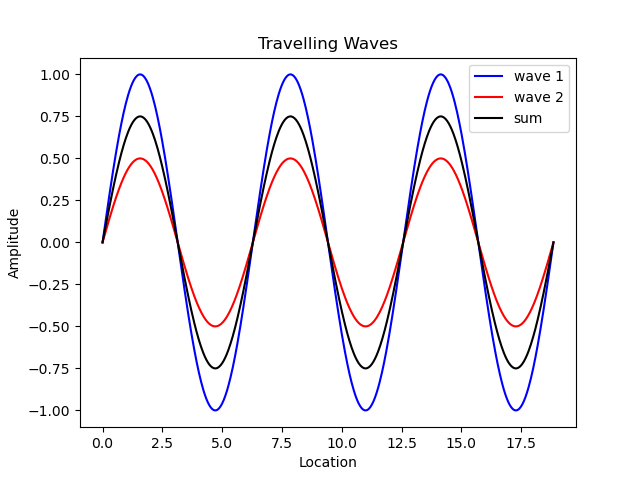

In [5]:
# Cell 2 - Wave 2 now half amplitude, same wave number, same wave velocity

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1 / 2, WaveNumber=1, Omega=1 / 16)
plot_waves("Cell 2", show_waves=True)

In [ ]:
# Cell 3 - Wave 2 now same amplitude, half wave number, same wave velocity

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1, WaveNumber=1 / 2, Omega=1 / 16)
plot_waves("Cell 3", show_waves=True)

In [ ]:
# Cell 4 - Wave 2 now same amplitude, same wave number, half wave velocity

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 8)
plot_waves("Cell 4", show_waves=True)

In [ ]:
# Cell 5 - Wave 2 now same amplitude, same wave number, *negative* half wave velocity

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=-1 / 8)
plot_waves("Cell 5", show_waves=True)

In [ ]:
# Cell 6 - Wave 2 now same amplitude, same wave number, *negative* wave velocity

wave1_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=1 / 16)
wave2_params = WaveParms(Amplitude=1, WaveNumber=1, Omega=-1 / 16)
plot_waves("Cell 6", show_waves=True)

In [ ]:
# Cell 7 - Wave 2 now same amplitude, same wave number, *negative* wave velocity

plot_waves("Cell 7", show_waves=False)  # Show only superposition wave